## Simple Linear Regression

### Loading & Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Adding filter warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
#File path
file_path = r'C:\Users\user1\Documents\Personal_Srini\Study\Data Science_PGDM\Machine Learning\Resources\Dataset\advertising.csv'

In [5]:
#Creating a dataframe
df = pd.read_csv(file_path)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# Checking the shape
df.shape

(200, 4)

In [7]:
#Checking for non null and datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
#Checking for value range
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


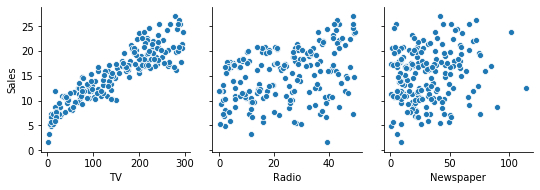

In [9]:
#Visualizing the data
#Pairplot
sns.pairplot(data = df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales')

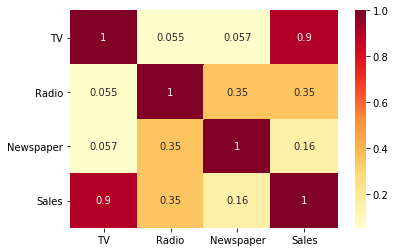

In [10]:
#Visualization the data
#Heatmap
sns.heatmap(df.corr(), annot = True, cmap = 'YlOrRd')
plt.show()

### Building the Model using `statsmodels`

In [11]:
#Import the required library
import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split

#### Steps
- Create X and y
- Create train and test datasets(70-30, 80-20)
- Train your model on training set(learn the co-efficient)
- Evaluate the model

In [12]:
X = df['TV']
y = df['Sales']

In [13]:
#Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 100)

In [14]:
#Checking if datasplit is proper
X_train.shape

(140,)

In [15]:
#Training the model

#Since the intercept value is not part of statsmodel we are adding  it
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [16]:
#Fitting the model

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [17]:
#Only Parameter c, m
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

The result of the above is 
- Sales = 6.94 + 0.05 TV

In [18]:
#Complete Summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           1.52e-52
Time:                        06:33:47   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

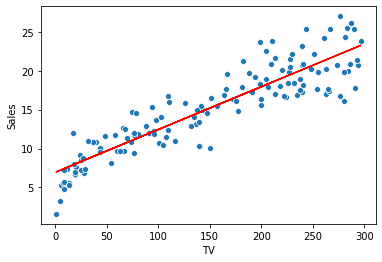

In [19]:
#Plotting the reg
sns.scatterplot(X_train, y_train)
plt.plot(X_train, (6.95 + 0.055 * X_train), 'r')
plt.show()

#### Residual Analysis

In [20]:
#residual is an error
#it is y_train - y_train_predicted

y_train_pred = lr_model.predict(X_train_sm)

#residual
res = y_train - y_train_pred

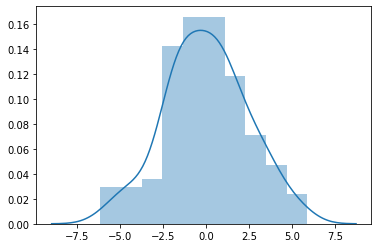

In [21]:
#Plotting the distplot and checking if res is normally distributed at mean 0
sns.distplot(res)
plt.show()

**Observation** - Here the error term `res` is normally distributed and high at mean 0

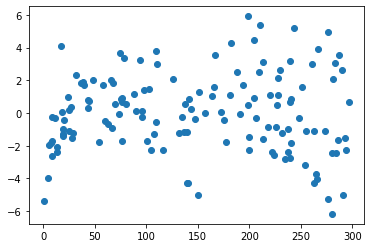

In [22]:
#Also checking for pattern in res
plt.scatter(X_train, res)
plt.show()

**Observation** - No visible pattern. Hence the model is good to go

#### Predicting and Evaluating

In [23]:
#Adding the missing constant/intercept
X_test_sm = sm.add_constant(X_test)

#Now we have to predict for X_test

y_test_pred = lr_model.predict(X_test_sm)

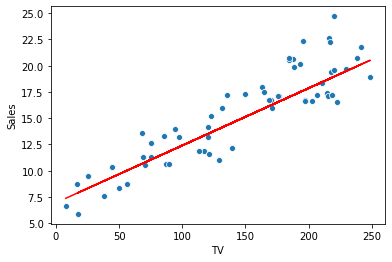

In [24]:
#Plotting the reg
sns.scatterplot(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [25]:
#Importing the package to verify the Model Built
#Using R^2 value
#Using root mean squarred error value

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

- R2 value - To sign off the model is good fit or not
- If R2 of test is `+- 5` of R2 of train, then it **good**

In [26]:
#Using r2_score library
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.7921031601245658

In [27]:
#Using mean_squared_error
mean_squared_error(y_true = y_test, y_pred = y_test_pred)

4.077556371826956

### Building the model using `sklearn`

**Steps**

- Import libraries
- Create X and y
- Split the train and test
- Create the linear regression object
- Fit the model and see params

In [29]:
#Importing neccessary additional libraries
from sklearn.linear_model import LinearRegression

In [28]:
#Creating the train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [32]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [33]:
#Creating the linear regression object
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#Lets print the params
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [35]:
#Evaluating the model:

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [36]:
#Printing

print(r2_score(y_true = y_test, y_pred = y_test_pred))
print(r2_score(y_true = y_train, y_pred = y_train_pred))

0.7921031601245662
0.8157933136480389


**Observation** - Results obtained are same from both the package